In [2]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def get_stock(stock,start,end):
     # return web.DataReader(stock,'google',start,end)['Close']
    return web.DataReader(stock,'iex',start,end)[['close']]

In [121]:
def RSI(series, period):
    delta = series.diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
    u = u.drop(u.index[:(period-1)])
    d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
    d = d.drop(d.index[:(period-1)])
    # rs = pd.stats.moments.ewma(u, com=period-1, adjust=False) / \
    #      pd.stats.moments.ewma(d, com=period-1, adjust=False)
    rs = u.ewm(com=period-1, adjust=False).mean() / \
         d.ewm(com=period-1, adjust=False).mean()
    return 100 - 100 / (1 + rs)

In [152]:
from datetime import datetime as dt
now = dt.today().strftime("%Y-%m-%d")
start_date = '2018-01-01'
end_date = now
stock_name = 'SEDG'

In [153]:
df = get_stock(stock_name, start_date, end_date)

In [154]:
# df['RSI'] = RSI(df['Close'], 14)
df['RSI'] = RSI(df['close'], 14)
df.tail()

,close,RSI
date,,
2018-11-01,41.030,55.089875
2018-11-02,37.750,44.049678
2018-11-05,39.095,48.598644
2018-11-06,37.620,44.340994
2018-11-07,38.750,48.092834


In [155]:
stock = df['close']
rsi = df['RSI']

In [156]:
mask = (df['RSI'] > 30) & (df['RSI'] < 70)
dff = df[mask]
stock_1 = dff['close']
rsi_1 = dff['RSI']

In [157]:
df.head()

,close,RSI
date,,
2018-01-02,38.05,NaN
2018-01-03,39.05,NaN
2018-01-04,37.35,NaN
2018-01-05,37.90,NaN
2018-01-08,38.35,NaN


In [158]:
dff.head()

,close,RSI
date,,
2018-01-23,35.65,39.743590
2018-01-24,35.30,38.503185
2018-01-25,36.40,44.378711
2018-01-26,36.75,46.141925
2018-01-29,37.10,47.919880


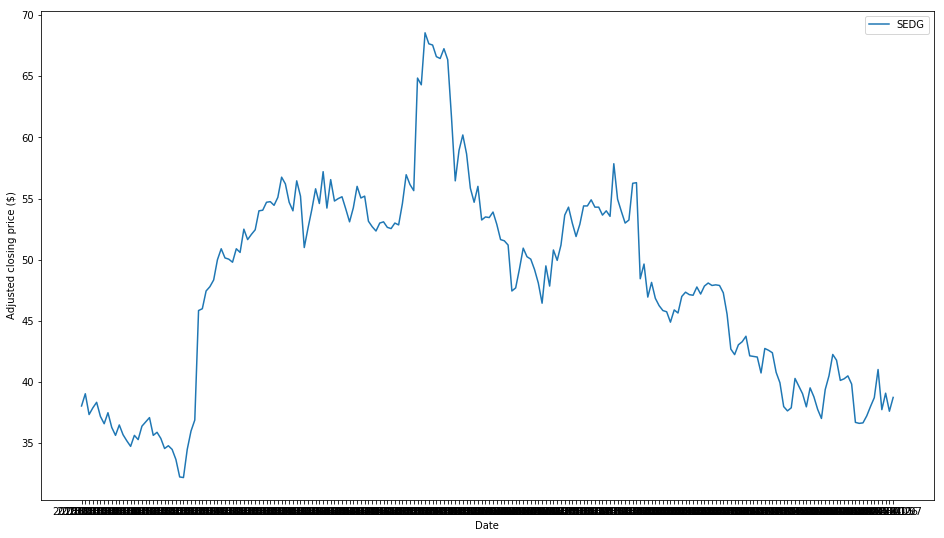

In [159]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(stock.index, stock, label=stock_name)

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

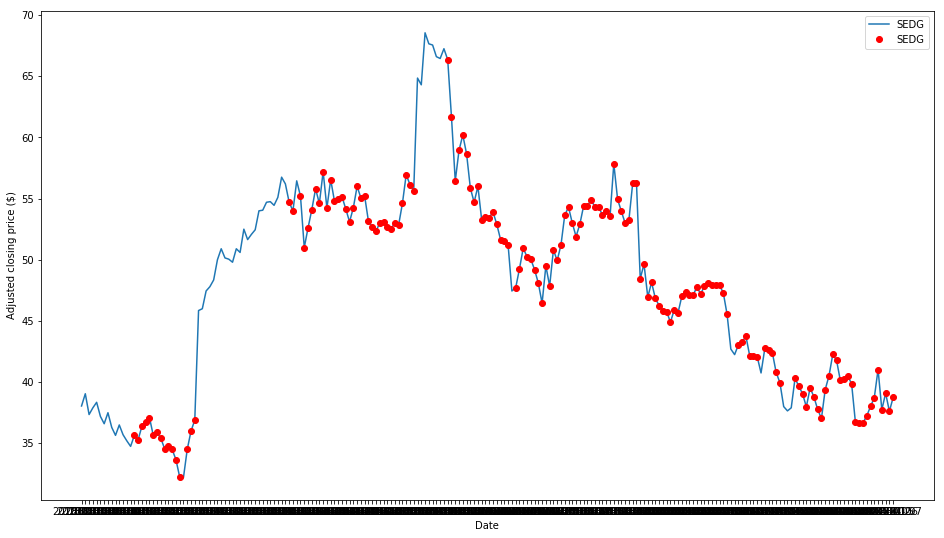

In [160]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(stock.index, stock, label=stock_name)
ax.plot(stock_1.index, stock_1, 'ro', label=stock_name)

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

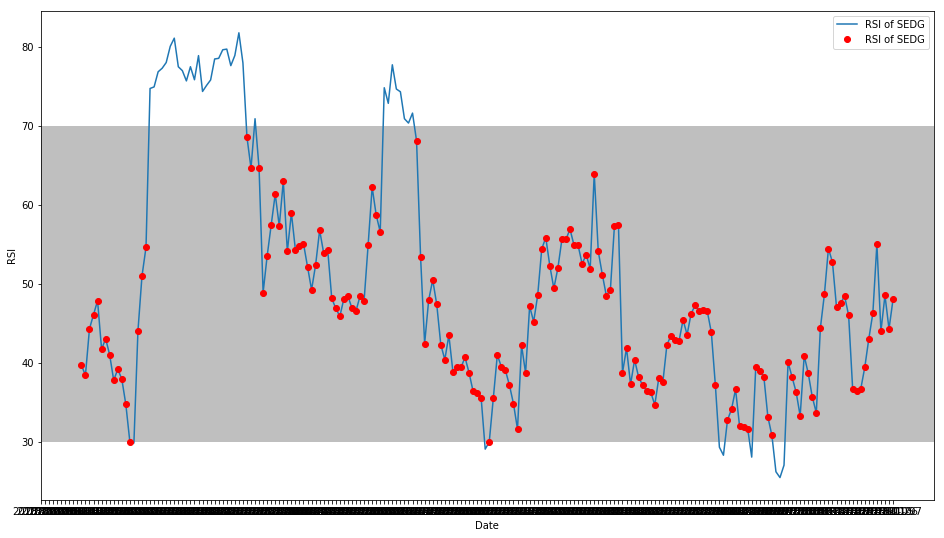

In [161]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(rsi.index, rsi, label='RSI of '+stock_name)
ax.plot(rsi_1.index, rsi_1, 'ro', label='RSI of '+stock_name)
ax.axhspan(30, 70, facecolor='0.5', alpha=0.5)

ax.set_xlabel('Date')
ax.set_ylabel('RSI')
ax.legend()

In [93]:
mask = (df.index > '2018-01-01') & (df.index < '2018-10-01')
dff = df[mask]
stock = dff['close']
rsi = dff['RSI']

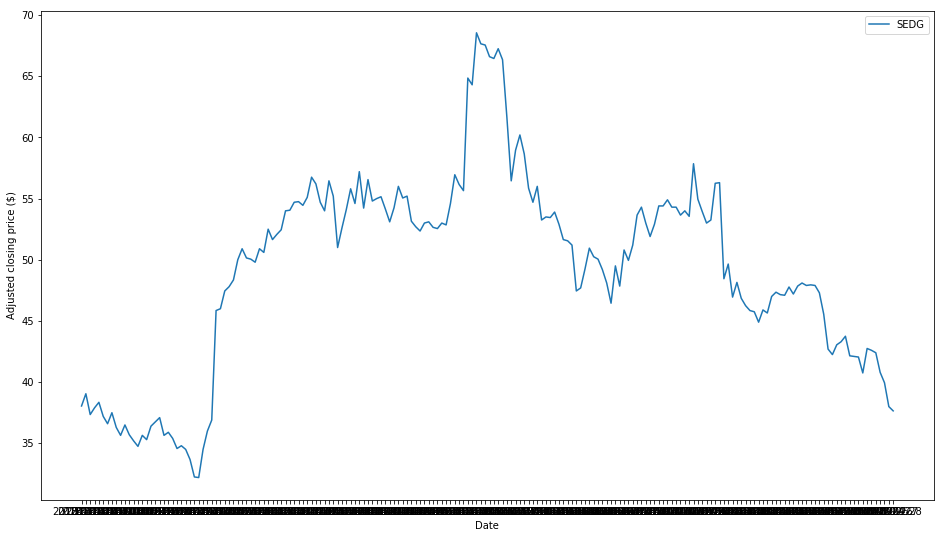

In [74]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(stock.index, stock, label=stock_name)

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

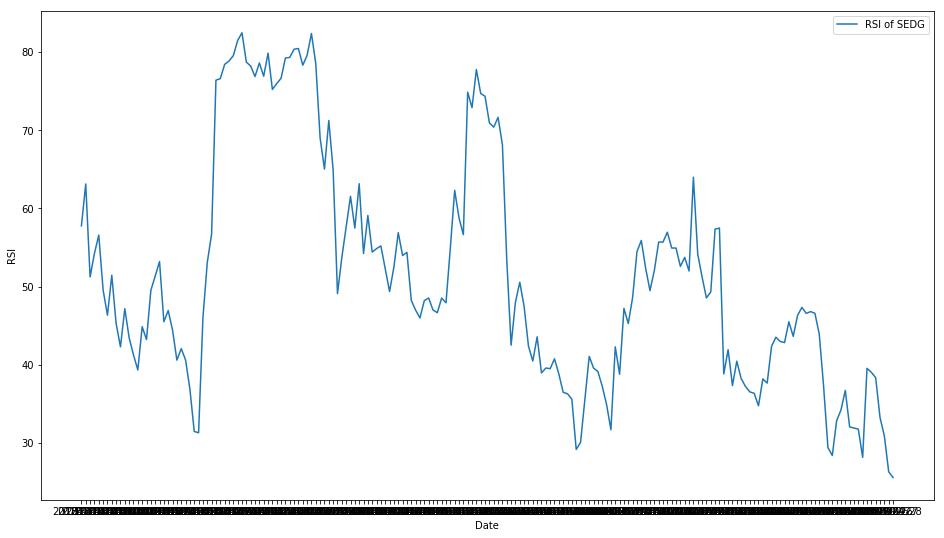

In [75]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(rsi.index, rsi, label='RSI of '+stock_name)

ax.set_xlabel('Date')
ax.set_ylabel('RSI')
ax.legend()